['Shell weight', 'Height', 'Sex2', 'Shucked weight', 'Diameter', 'Sex1']


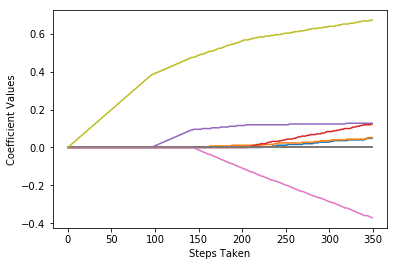

In [2]:
from urllib.request import urlopen
from pylab import *
import matplotlib.pyplot as plot

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urlopen(target_url)

xList = []
labels = []
for line in data:
    line = line.decode()
    #split on semi-colon
    row = line.strip().split(",")
    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))
    #form list of list of attributes (all strings)
    xList.append(row)
    
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
         'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0
    
    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)
    
namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', \
         'Whole weight', 'Shucked weight', 'Viscera weight', \
         'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xMeans = []
xSD = []
for i in range(ncols):
    col = [xCoded[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xCoded[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)
    
#use calculate mean and standard deviation to normalize xCoded
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xCoded[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)
labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#initialize a vector of coefficients beta
beta = [0.0] * ncols

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrows
    for j in range(nrows):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncols)])
        residuals[j] = labelNormalized[j] - labelsHat
        
    #calculate correlation between attribute columns from
    #normalized wine and residual
    corr = [0.0] * ncols
    
    for j in range(ncols):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrows)]) / nrows
        
    iStar = 0
    corrStar = corr[0]
    
    for j in range(1, (ncols)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]
            
    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))
    
    nzBeta = [index for index in range(ncols) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

nameList = [namesCoded[nzList[i]] for i in range(len(nzList))]
print(nameList)

for i in range(ncols):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()